<a href="https://colab.research.google.com/github/OSolerHugo/IMD_Netflix_DATA/blob/main/IMD_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Pipeline for IMDB Top Netflix Movies and TV Shows


This notebook presents a comprehensive data cleaning pipeline for a dataset imported from Kaggle, focusing on the IMDB top Netflix movies and TV shows. In this notebook, various methods will be employed to effectively clean the dataset and prepare it for further analysis.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install kaggle

np.random.seed(0)

In [ ]:
!mkdir /root/.kaggle/

!mv kaggle.json /root/.kaggle/

!kaggle datasets download -d bharatnatrayn/movies-dataset-for-feature-extracion-prediction

!unzip movies-dataset-for-feature-extracion-prediction.zip

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 116MB/s]
Archive:  movies-dataset-for-feature-extracion-prediction.zip
  inflating: movies.csv              


<h2>Dataset Columns:</h2>

<ul>
  <li><strong>MOVIES:</strong> Contains the names of the movies.</li>
  <li><strong>YEAR:</strong> Represents the year when the movie or TV show was telecasted for the audience.</li>
  <li><strong>GENRE:</strong> Provides information about the genre(s) of the movie or TV show, which is valuable for recommendation systems.</li>
  <li><strong>RATING:</strong> Reflects the audience's opinion or rating of the movie or TV show.</li>
  <li><strong>ONE-LINE:</strong> Presents a short description that aims to create a first impression for the audience.</li>
  <li><strong>STARS:</strong> Lists the cast members or actors involved, which often sparks discussions among the audience.</li>
  <li><strong>VOTES:</strong> Represents the audience's expression of their views or opinions, which can be helpful in identifying the impact made by the art.</li>
  <li><strong>RUNTIME:</strong> Indicates the duration or running time of the movie or TV show.</li>
  <li><strong>GROSS:</strong> Provides the total amount earned worldwide by the movie or TV show.</li>
</ul>


In [ ]:
movies_raw = pd.read_csv('movies.csv')

movies_raw.sample(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9446,The Drew Barrymore Show,(2020– ),\nTalk-Show,NaN,"\n""She Persisted: 13 American Women Who Change...","\n \n Stars:\nDrew Barrymore, \n...",NaN,44.0,NaN
898,Miseuteo Shunshain,(2018),"\nAction, Drama, History",8.8,\nA young boy who ends up in the U.S. after th...,"\n \n Stars:\nLee Byung-hun, \nK...","5,228",80.0,NaN
2398,The Incredible Jessica James,(2017),\nComedy,6.5,\nAn aspiring playwright in New York strikes u...,\n Director:\nJim Strouse\n| \n Stars:\n...,"6,808",85.0,NaN
5906,Das Privileg,(TV Movie),NaN,NaN,\nAdd a Plot\n,"\n Directors:\nFelix Fuchssteiner, \nKathar...",NaN,NaN,NaN
2343,Sunderland 'Til I Die,(2018– ),"\nDocumentary, Sport",8.1,\nHighlights the unfailing passion Sunderland ...,"\n \n Stars:\nNick Barnes, \nGeo...","7,196",39.0,NaN


In [ ]:
# get the number of missing data points per column
movies_raw.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Let's examine the percentage of missing data in the dataset.

In [ ]:
missing_percentage = movies_raw.isnull().sum() / len(movies_raw) * 100

missing_percentage


MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

As observed in the previous analysis, certain columns exhibit a higher proportion of missing values compared to others. Notably, the "Gross" column stands out with over 95% of the data missing. Consequently, it is advisable to remove the "Gross" column from the dataset. However, additional exploration is necessary for the remaining columns.

Let us see the column YEAR:

In [ ]:
movies_raw.YEAR

0            (2021)
1          (2021– )
2       (2010–2022)
3          (2013– )
4            (2021)
           ...     
9994       (2021– )
9995       (2021– )
9996       (2022– )
9997       (2021– )
9998       (2021– )
Name: YEAR, Length: 9999, dtype: object

Firstly, let us estract the years from the column

In [ ]:
df_movies = movies_raw.drop(['Gross'],axis=1)

#We will remove parenthesis from the column
df_movies.YEAR = df_movies.YEAR.str.extract(r'([0-9]{4}–.*|[0-9]{4})')
df_movies.YEAR = df_movies.YEAR.str.strip().replace(")","")

#take only the numbers
df_movies.YEAR = df_movies.YEAR.apply(lambda x: str(x)[:4])

#transforming to datetime:
df_movies.YEAR = pd.to_datetime(df_movies.YEAR,format='%Y')

#Firlst let us to fullfil the null places with unknow:
df_movies.YEAR = df_movies.YEAR.fillna('Unknow')

I prefer to set the missing years as 'Unknown' because this information may not be crucial for the dataset, and if needed, it is possible to search for this information externally.


Now, we will look to the rating

In [ ]:
df_movies.RATING.describe()

count    8179.000000
mean        6.921176
std         1.220232
min         1.100000
25%         6.200000
50%         7.100000
75%         7.800000
max         9.900000
Name: RATING, dtype: float64

In [ ]:
df_movies.RATING.unique()

array([6.1, 5. , 8.2, 9.2, nan, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4,
       9.3, 7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7,
       4.4, 3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. ,
       3.4, 2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

As evident from the data, there are no ratings with a value of 0. Therefore, to obtain numeric results, I will replace the 'NaN' values with 0. However, please note that this decision can be revised in the future for other types of analyses if necessary.

In [ ]:
df_movies.RATING = df_movies.RATING.fillna(0.0)

df_movies.RATING.unique()

array([6.1, 5. , 8.2, 9.2, 0. , 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4,
       9.3, 7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7,
       4.4, 3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. ,
       3.4, 2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

We will do the same thing to "VOTES", however we need to replace the ",".

In [ ]:
df_movies.VOTES = df_movies.VOTES.str.replace(",","")
df_movies.VOTES = df_movies.VOTES.fillna(0.0)

df_movies.VOTES = pd.to_numeric(df_movies.VOTES)

df_movies.VOTES

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            0.0
          ...   
9994         0.0
9995         0.0
9996         0.0
9997         0.0
9998         0.0
Name: VOTES, Length: 9999, dtype: float64

Now let us see the "RUNTIME"

In [ ]:
df_movies.RunTime = df_movies.RunTime.fillna(0.0)
df_movies.RunTime.unique()

array([121.,  25.,  44.,  23.,   0.,  50., 110.,  53.,  30., 114.,  42.,
       107.,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
        99., 124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91.,
       117., 135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,
       209., 201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145.,
       128., 147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11.,
       152.,  94., 133., 298.,  28., 126., 102., 106., 385., 122., 452.,
       120., 494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164.,
       386., 363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154.,
       130., 491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78.,
       316., 264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,
        21., 220., 331.,  39.,   9., 281.,  10., 55

And the last is GENRE

In [ ]:
df_movies[df_movies.GENRE.isnull()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
2124,Rodney & Sheryl,Unknow,NaN,0.0,\nBased on the unbelievable true story of seri...,\n Director:\nChloe Okuno\n| \n Star:\nA...,0.0,0.0
3144,Our Man from Jersey,Unknow,NaN,0.0,\nAdd a Plot\n,"\n \n Stars:\nMark Wahlberg, \nH...",0.0,0.0
3433,The Upper World,Unknow,NaN,0.0,\nEsso is caught in a deadly feud and on the v...,\n \n Star:\nDaniel Kaluuya\n,0.0,0.0
3695,Kod Adi: Kulüp,2021-01-01 00:00:00,NaN,0.0,\nAdd a Plot\n,"\n \n Stars:\nGökçe Bahadir, \nB...",0.0,0.0
4039,Oompa-Loompas,Unknow,NaN,0.0,\nTV series centering on the adventures of the...,\n,0.0,0.0
...,...,...,...,...,...,...,...,...
6453,Untitled Tituss Burgess/Netflix Project,Unknow,NaN,0.0,\nPlot under wraps.,\n,0.0,0.0
6461,One Piece: Enter Chopper at the Winter Island,2020-01-01 00:00:00,NaN,0.0,\nAdd a Plot\n,\n,0.0,0.0
8769,Rádio Coisa Mais Linda,2020-01-01 00:00:00,NaN,0.0,\nAdd a Plot\n,\n Director:\nCaito Ortiz\n| \n Stars:\n...,0.0,0.0
8770,Rádio Coisa Mais Linda,2020-01-01 00:00:00,NaN,0.0,\nAdd a Plot\n,\n Director:\nCaito Ortiz\n| \n Stars:\n...,0.0,0.0


As 'GENRE' has only 80 null lines and a lot of them has others null values, let drop all these values.

In [ ]:
df_movies = df_movies.dropna()

Also it is important to clean the text columns.

In [ ]:
for col in ['GENRE','ONE-LINE','STARS']:
    df_movies[col] = df_movies[col].str.replace("\n","").str.strip()

df_movies.head()

<ipython-input-15-2d6e282d859b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[col] = df_movies[col].str.replace("\n","").str.strip()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021-01-01 00:00:00,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062.0,121.0
1,Masters of the Universe: Revelation,2021-01-01 00:00:00,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0
2,The Walking Dead,2010-01-01 00:00:00,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0
3,Rick and Morty,2013-01-01 00:00:00,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849.0,23.0
4,Army of Thieves,2021-01-01 00:00:00,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0.0,0.0



The next step is to visualize the data

In [ ]:
year_count = df_movies.YEAR.value_counts().reset_index().rename(columns = {'YEAR':'Count','index':'Year'})

year_count.head(5)

,Year,Count
0,2020-01-01 00:00:00,1687
1,2019-01-01 00:00:00,1418
2,2021-01-01 00:00:00,1113
3,2018-01-01 00:00:00,1088
4,2017-01-01 00:00:00,842


[Text(0, 0, '2020'),
 Text(1, 0, '2019'),
 Text(2, 0, '2021'),
 Text(3, 0, '2018'),
 Text(4, 0, '2017')]

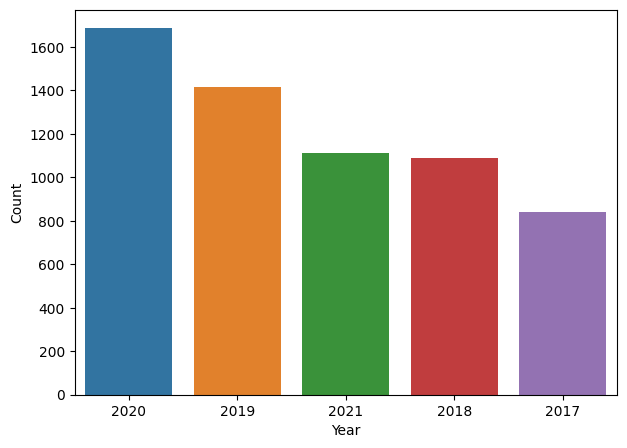

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))



g = sns.barplot(x="Year", y="Count", data=year_count.head(5))
g.set_xticklabels(['2020','2019','2021','2018','2017'])


Rating

In [ ]:
rating_count = df_movies.RATING.value_counts().reset_index().rename(columns = {'RATING':'Count','index':'RATING'})
rating_count = rating_count.sort_values(by=['RATING']).reset_index().drop('index',axis=1)

rating_count

,RATING,Count
0,0.0,1751
1,1.1,1
2,1.8,1
3,2.0,1
4,2.1,3
...,...,...
78,9.5,13
79,9.6,10
80,9.7,5
81,9.8,2


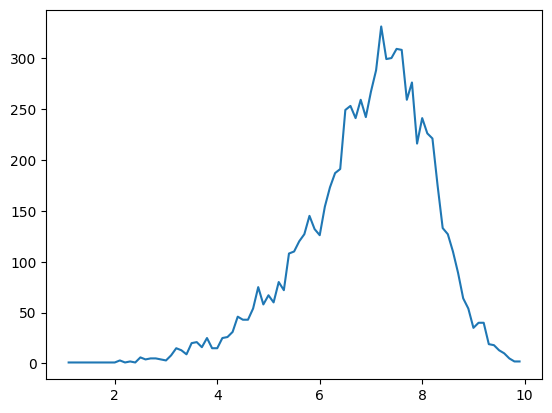

In [ ]:
#The [1:] is to exclude the NAN values that is set equal 0

plt.plot(rating_count['RATING'][1:],rating_count['Count'][1:])
plt.show()


This remember a normal distribution that is a distribution that is expected for this type of data.

 we will create separate columns for each genre in the dataset and assign a value of 1 if the movie belongs to that genre and 0 if it does not. Since each movie can have multiple genres, we cannot use the get_dummies function.

In [ ]:

genre_unique = []
for line in df_movies.GENRE:
  genres = line.split(", ")

  for genre in genres:
    if not (genre in genre_unique):
      genre_unique.append(genre)

genre_unique

['Action',
 'Horror',
 'Thriller',
 'Animation',
 'Adventure',
 'Drama',
 'Comedy',
 'Crime',
 'Romance',
 'Mystery',
 'Fantasy',
 'History',
 'Sci-Fi',
 'Biography',
 'Family',
 'Documentary',
 'Music',
 'Sport',
 'Short',
 'Game-Show',
 'Reality-TV',
 'Musical',
 'War',
 'Western',
 'Film-Noir',
 'Talk-Show',
 'News']

In [ ]:
df_movies_genre = df_movies

df_movies_genre.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021-01-01 00:00:00,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062.0,121.0
1,Masters of the Universe: Revelation,2021-01-01 00:00:00,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0
2,The Walking Dead,2010-01-01 00:00:00,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0
3,Rick and Morty,2013-01-01 00:00:00,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849.0,23.0
4,Army of Thieves,2021-01-01 00:00:00,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0.0,0.0


In [ ]:
def get_genre(genres,name):
  genres = genres.split(", ")
  if name in genres: return (1)
  return(0)


In [ ]:
for genre in genre_unique:
  df_movies_genre[genre] = df_movies_genre.apply(lambda row: get_genre(row['GENRE'],genre),axis=1)


In [ ]:
df_movies_genre.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Horror,...,Sport,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,Talk-Show,News
0,Blood Red Sky,2021-01-01 00:00:00,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062.0,121.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,2021-01-01 00:00:00,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,2010-01-01 00:00:00,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Rick and Morty,2013-01-01 00:00:00,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849.0,23.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,2021-01-01 00:00:00,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0


Additionally, I will be dropping certain columns to create a concise dataset that can be utilized for further analyses specifically focused on the genre. It's important to note that other analyses may still require the columns I am dropping. For instance, if I want to examine the correlation between a specific Star movie and its genre, or between the Star movie and its rating.

In [ ]:
df_movies_genre = df_movies_genre.drop(columns=['GENRE','ONE-LINE','STARS'])

df_movies_genre.head()

,MOVIES,YEAR,RATING,VOTES,RunTime,Action,Horror,Thriller,Animation,Adventure,...,Sport,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,Talk-Show,News
0,Blood Red Sky,2021-01-01 00:00:00,6.1,21062.0,121.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,2021-01-01 00:00:00,5.0,17870.0,25.0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,2010-01-01 00:00:00,8.2,885805.0,44.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rick and Morty,2013-01-01 00:00:00,9.2,414849.0,23.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,2021-01-01 00:00:00,0.0,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movies_genre = df_movies_genre.set_index('MOVIES')

In [ ]:
df_movies_genre.YEAR = pd.to_datetime(df_movies_genre['YEAR'], errors='coerce').dt.year.astype(float)

df_movies_genre.head()

,YEAR,RATING,VOTES,RunTime,Action,Horror,Thriller,Animation,Adventure,Drama,...,Sport,Short,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,Talk-Show,News
MOVIES,,,,,,,,,,,,,,,,,,,,,
Blood Red Sky,2021.0,6.1,21062.0,121.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Masters of the Universe: Revelation,2021.0,5.0,17870.0,25.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
The Walking Dead,2010.0,8.2,885805.0,44.0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Rick and Morty,2013.0,9.2,414849.0,23.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Army of Thieves,2021.0,0.0,0.0,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As an example, let's conduct an analysis focused on the Sci-Fi genre to explore the various information we have available. We will examine different aspects related to Sci-Fi,
which uncorrelatedly is my favorite genre.

In [ ]:
df_scifi_described = df_movies_genre[['YEAR','RATING','VOTES','RunTime','Sci-Fi']].groupby('Sci-Fi').describe()

df_scifi_described.head()

YEAR                                                                 \
         count         mean       std     min     25%     50%     75%     max   
Sci-Fi                                                                          
0       8950.0  2016.266480  7.280390  1932.0  2015.0  2018.0  2020.0  2023.0   
1        277.0  2015.631769  7.889279  1957.0  2015.0  2018.0  2019.0  2022.0   

        RATING            ...     VOTES            RunTime             \
         count      mean  ...       75%        max   count       mean   
Sci-Fi                    ...                                           
0       9609.0  5.698699  ...   2553.00  1713028.0  9609.0  48.405557   
1        310.0  5.733226  ...  16586.25   897444.0   310.0  57.283871   

                                                  
              std  min    25%   50%   75%    max  
Sci-Fi                                            
0       50.464646  0.0   0.00  42.0  86.0  853.0  
1       53.010258  0.0  25.25  46.0  90.0  498.0  

[2 rows x 32 columns]

In [ ]:
df_scifi_described.YEAR

,count,mean,std,min,25%,50%,75%,max
Sci-Fi,,,,,,,,
0,8950.0,2016.266480,7.280390,1932.0,2015.0,2018.0,2020.0,2023.0
1,277.0,2015.631769,7.889279,1957.0,2015.0,2018.0,2019.0,2022.0


In [ ]:
df_movies_genre.YEAR.describe()

count    9227.000000
mean     2016.247426
std         7.299752
min      1932.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2023.000000
Name: YEAR, dtype: float64

In [ ]:
df_scifi = df_movies_genre.loc[df_movies_genre['Sci-Fi']==1][['YEAR','RATING','VOTES','RunTime']]

df_scifi.head()

,YEAR,RATING,VOTES,RunTime
MOVIES,,,,
Black Mirror,2011.0,8.8,469407.0,60.0
The Expanse,2015.0,8.5,119644.0,60.0
The 100,2014.0,7.6,226962.0,43.0
Jurassic Park,1993.0,8.1,897444.0,127.0
Star Trek: Voyager,1995.0,7.8,61917.0,44.0


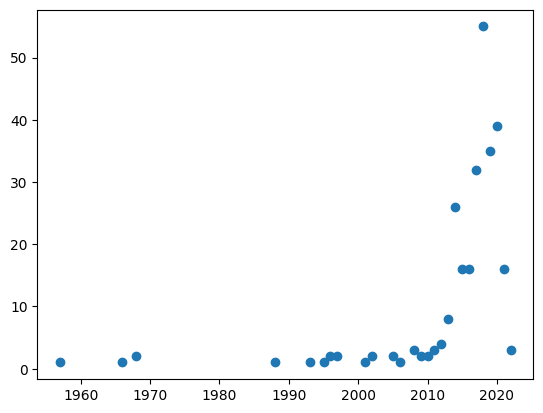

In [ ]:
scifi_year_count=df_scifi.YEAR.value_counts()
plt.scatter(scifi_year_count.index,scifi_year_count)

plt.show()

By observing the graph, we can clearly see that the number of Sci-Fi movies in our dataset has been increasing in recent years. This is evident as the mean value of the release year is 2016.

To gain a better understanding of this trend, we can compare it to the overall number of films released per year in the dataset. This will help us determine if the growth in the Sci-Fi genre is due to an overall increase in film production or if it is specific to the genre itself.

In [ ]:
year_count = df_movies_genre.YEAR.value_counts().reset_index().rename(columns = {'YEAR':'Count','index':'YEAR'})
scifi_year_count= scifi_year_count.reset_index().rename(columns = {'YEAR':'Count_scifi','index':'YEAR'})




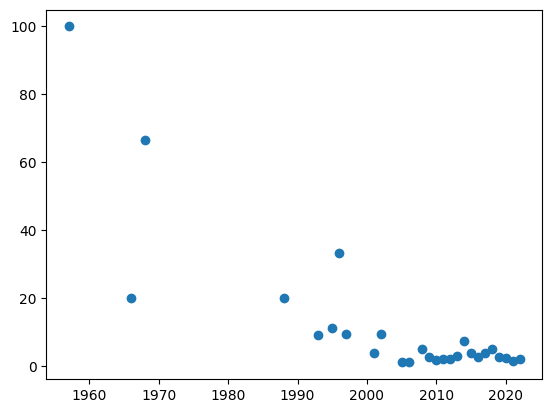

In [ ]:
scifi_year_percent = pd.merge(scifi_year_count, year_count,
                              on='YEAR', how='inner')
scifi_year_percent['percent'] = scifi_year_percent.Count_scifi/scifi_year_percent.Count*100


plt.scatter(scifi_year_percent.YEAR,scifi_year_percent.percent)

plt.show()

The graph shows an upward trend in the absolute number of Sci-Fi films over the years. However, we need to exercise caution in our analysis due to the relatively low number of movies released in the past. To obtain a more accurate picture, considering a larger time interval (greater than one year) might provide a more realistic perspective on the growth of Sci-Fi films compared to the overall film production.

Additionally, we can closely examine the ratings of the Sci-Fi movies.



In [49]:
df_scifi.loc[df_scifi['RATING'] !=0].RATING.describe()

count    270.000000
mean       6.582593
std        1.220957
min        1.800000
25%        6.000000
50%        6.800000
75%        7.400000
max        9.200000
Name: RATING, dtype: float64

In [50]:
df_movies.loc[df_movies['RATING'] !=0].RATING.describe()

count    8168.000000
mean        6.921658
std         1.219852
min         1.100000
25%         6.200000
50%         7.100000
75%         7.800000
max         9.900000
Name: RATING, dtype: float64

The condition "df_scifi['RATING'] != 0" is used because we designated 0 values to represent NaN values in the dataset.

Upon comparing all the data with the Sci-Fi movies, it becomes apparent that Sci-Fi movies tend to have slightly lower ratings than the rest of the movies in the dataset.

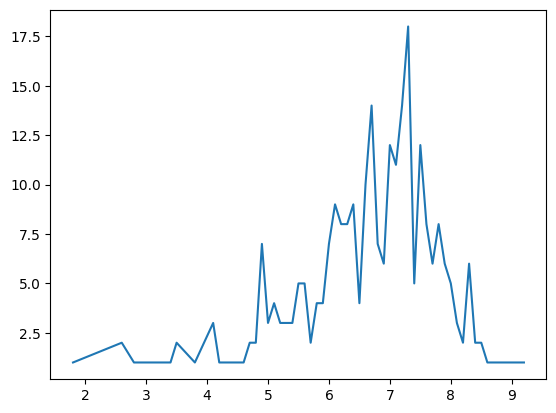

In [42]:
scifi_rating = df_scifi.RATING.value_counts().reset_index().rename(columns = {'RATING':'Count','index':'RATING'})

scifi_rating = scifi_rating.sort_values(by=['RATING']).reset_index().drop('index',axis=1)


plt.plot(scifi_rating.RATING[1:],scifi_rating.Count[1:])
plt.show()

This type of analyses can be made for all the Genre we have separate.